In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")
def data_shape(train):
    train["YearRemodAdd"] = train["YearRemodAdd"] - train["YearBuilt"]
    train["YearBuilt"] = train["YearBuilt"] - 1900
    train["GarageYrBlt"] = train["GarageYrBlt"] - 1900
    return train
train = data_shape(train)
test = data_shape(test)

In [2]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(train.describe())
#test.describe()

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000          NaN    7553.500000     5.000000   
50%     730.500000    50.000000          NaN    9478.500000     6.000000   
75%    1095.250000    70.000000          NaN   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342    71.267808     13.597945   103.685262   443.639726   
std       1.112799    30.202904     24.476465   181.066207   456.098091   
min       1.000

In [6]:
print("data size \ntrain : {}\ntest : {}".format(len(train), len(test)))
train["PoolQC"].dropna()

data size 
train : 1460
test : 1459


197     Ex
810     Fa
1170    Gd
1182    Ex
1298    Gd
1386    Fa
1423    Gd
Name: PoolQC, dtype: object

In [8]:
#データの詳細を確認する

#データの種類の確認
#以下の3種類に分ける
#1. categorical data
#2. value data
#3. no relevance data


print("feature num", len(train.columns))

('feature num', 81)


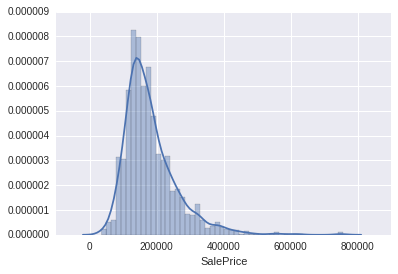

[  9.    9.2   9.4   9.6   9.8  10.   10.2  10.4  10.6  10.8  11.   11.2
  11.4  11.6  11.8  12.   12.2  12.4  12.6  12.8  13.   13.2  13.4  13.6
  13.8]


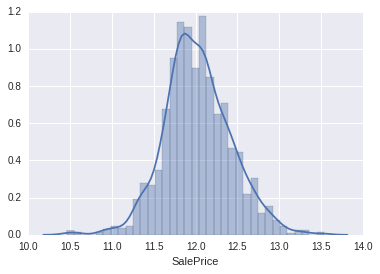

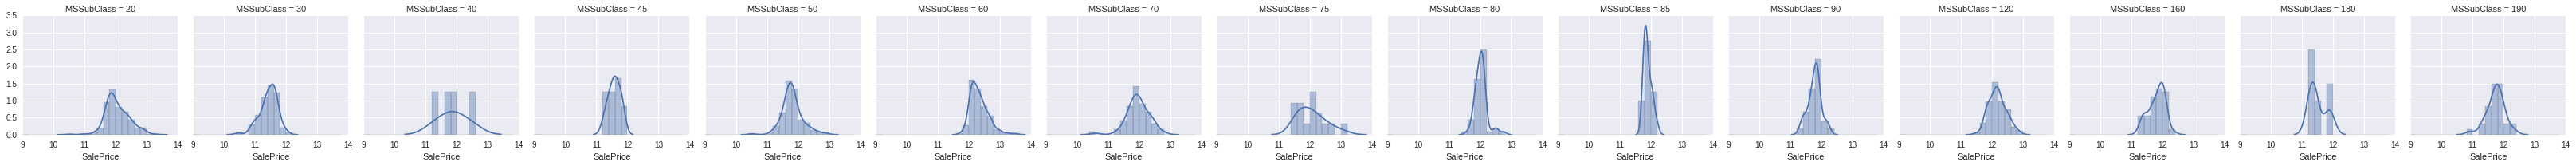

In [10]:
#SalePriceのヒストグラムを描く
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(train["SalePrice"])
plt.show()

sns.distplot(np.log(train["SalePrice"]))
#SalePriceは大体対数正規分布に従う -> log(SalePrice)を正規分布と仮定して予測モデルを作成すれば良い

#他の数値特徴量のグラフも見る
bins = np.arange(9, 14, 0.2)
print(bins)
_train = train.copy()
_train["SalePrice"] = np.log(_train["SalePrice"])
g = sns.FacetGrid(_train, col="MSSubClass")
g.map(sns.distplot, "SalePrice", bins=bins)


In [ ]:
#ボツ案
#相関係数 th_val 未満、 相関比 th_cat 未満は使用しない
th_cat = 0.1
th_val = 0.2

re_val_corr = val_corr.copy()
re_cat_corr = cat_corr.copy()

for k in re_val_corr.keys():
    if np.abs(re_val_corr[k]) < 0.2:
        del re_val_corr[k]
        print(k)
    
for k in re_cat_corr.keys():
    if re_cat_corr[k] < 0.1:
        del re_cat_corr[k]
        print(k)
print(len(re_val_corr.keys()))

re_onehot_arr, test_onehot_arr = cls2onehot(name_col, cat_corr, thresh=th_cat)
re_feats_arr, re_target_arr = value2arr(val_col, val_corr, thresh=th_val)
test_feats_arr, _ = value2arr(val_col, val_corr, thresh=th_val, TEST=True)
re_total_feats = np.c_[re_feats_arr, re_onehot_arr]
test_total_feats = np.c_[test_feats_arr, test_onehot_arr]
#特徴量を減らした xgboost
import sys
sys.path.append("xgboost/python-package/")
train_feats = re_total_feats[:train_size]
val_feats = re_total_feats[train_size:]
train_targets = np.log(target_arr[:train_size])
val_targets = np.log(target_arr[train_size:])

import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(train_feats, train_targets)
predict = model.predict(train_feats)
val_predict = model.predict(val_feats)
rmse = np.sqrt(np.mean((predict - train_targets)**2))
val_rmse = np.sqrt(np.mean((val_predict - val_targets)**2))

print("Train RMSE : {}\nValid RMSE : {}".format(rmse, val_rmse))
#val rmseは少し減少 -> 特徴量を修正すると若干悪くなる結果に

In [ ]:
plt.plot